## Importing Libraries and setting-up environment

In [42]:
import pandas as pd #Data manipulation and analysis
import numpy as np #Numerical computing
import matplotlib.pyplot as plt #Data Visualzation
import seaborn as sns #Data Visualzation
import time #Various time-related functions

In [43]:
#Settings for appropriate display  

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [44]:
#Ignoring all warning ⚠ messages thrown

import warnings
warnings.filterwarnings('ignore')

## Importing Data

In [45]:
import yfinance as yf

df = yf.download(tickers = "VOO", start="2010-01-01", end="2022-04-01")
df.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-09-09,102.500000,102.500000,101.139999,101.320000,81.077713,26500
2010-09-10,101.680000,101.860001,101.300003,101.779999,81.445839,8600
2010-09-13,102.959999,103.139999,102.500000,103.059998,82.470108,33750
2010-09-14,102.839996,103.480003,102.379997,103.040001,82.454102,59400
2010-09-15,102.620003,103.379997,102.400002,103.300003,82.662155,9250


## Correcting the Dataset

In [46]:
df = df["Close"]
df = pd.DataFrame(df)
df.head()

,Close
Date,
2010-09-09,101.320000
2010-09-10,101.779999
2010-09-13,103.059998
2010-09-14,103.040001
2010-09-15,103.300003


## Visualizing the Data

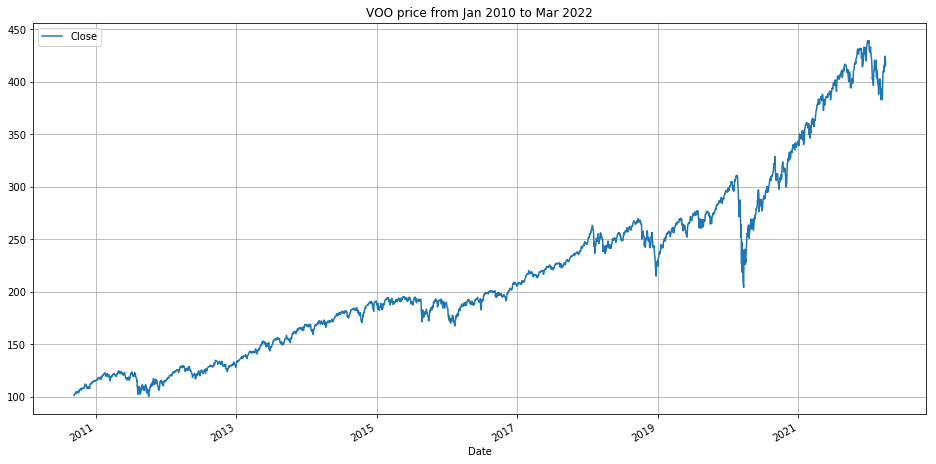

In [47]:
df.plot(figsize=(16,8), title = "VOO price from Jan 2010 to Mar 2022", grid = True)

## Calculations

In [48]:
#Simple Moving Average

df['SMA_1'] = df.Close.rolling(7, min_periods=1).mean() #Period of 1 week
df['SMA_2'] = df.Close.rolling(14, min_periods=1).mean() #Period of 2 weeks
df['SMA_4'] = df.Close.rolling(28, min_periods=1).mean() #Period of 4 weeks

In [49]:
#Cumulative Moving Average

df['CMA'] = df.Close.expanding().mean()

In [50]:
#Exponential Moving Average

df['EMA_0.1'] = df.Close.ewm(alpha=0.1, adjust=False).mean() #Smoothing factor - 0.1
df['EMA_0.3'] = df.Close.ewm(alpha=0.3, adjust=False).mean() #Smoothing factor - 0.3

In [51]:
df[2849:] #Data from Jan 2022 to Mar 2022

,Close,SMA_1,SMA_2,SMA_4,CMA,EMA_0.1,EMA_0.3
Date,,,,,,,
2022-01-03,439.250000,437.504290,432.148573,428.813930,213.784217,432.360084,437.111139
2022-01-04,439.070007,438.422860,433.075716,429.121073,213.863237,433.031076,437.698800
2022-01-05,430.660004,437.258575,432.926431,429.090002,213.939253,432.793969,435.587161
2022-01-06,430.079987,436.058572,433.015002,429.373572,214.015012,432.522571,433.935009
2022-01-07,428.589996,434.569999,433.315000,429.421787,214.090196,432.129313,432.331505
2022-01-10,428.029999,433.178571,433.902858,429.742144,214.165131,431.719382,431.041053
2022-01-11,431.779999,432.494284,434.337858,430.368573,214.241327,431.725443,431.262737
2022-01-12,433.070007,431.611428,434.557859,430.815359,214.317921,431.859900,431.804918
2022-01-13,427.100006,429.901428,434.162144,431.181788,214.392372,431.383910,430.393444


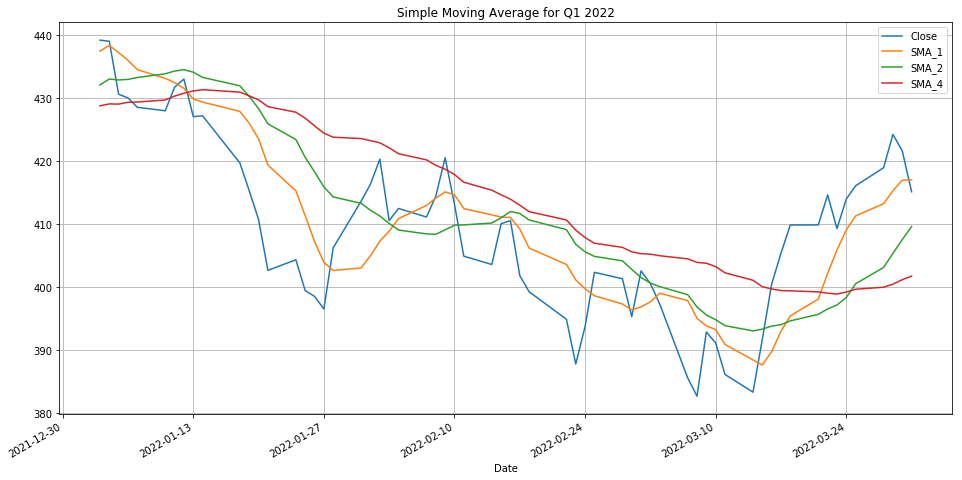

In [53]:
#Plotting Simple Moving Average for Q1 2022

df[2849:][['Close', 'SMA_1', 'SMA_2', 'SMA_4']].plot(figsize=(16,8), title = "Simple Moving Average for Q1 2022", grid = True)

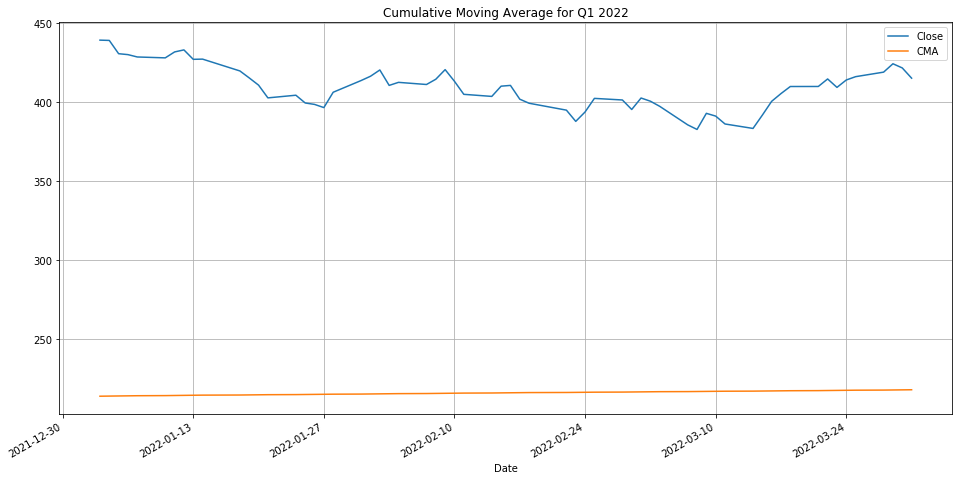

In [54]:
#Plotting Cumulative Moving Average for Q1 2022

df[2849:][['Close', 'CMA']].plot(figsize=(16,8), title = "Cumulative Moving Average for Q1 2022", grid = True)

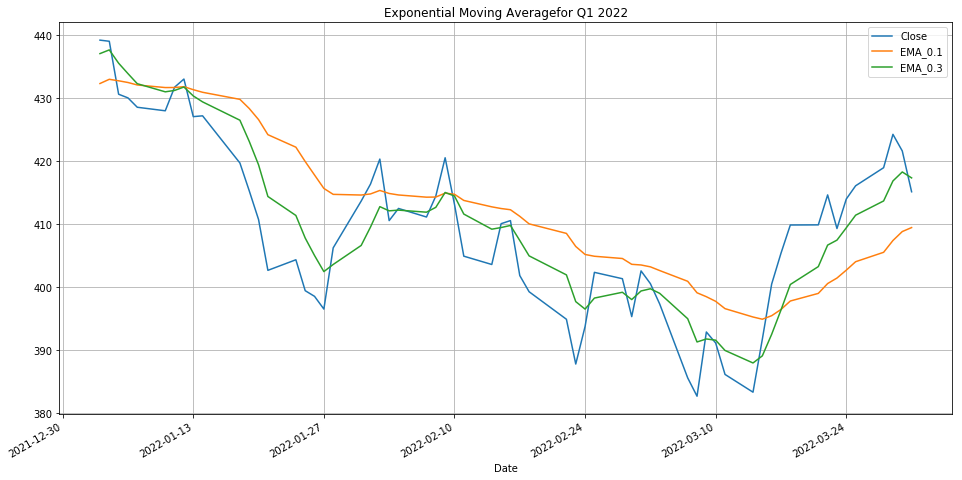

In [55]:
#Plotting Exponential Moving Average for Q1 2022

df[2849:][['Close', 'EMA_0.1', 'EMA_0.3']].plot(figsize=(16,8), title = "Exponential Moving Averagefor Q1 2022", grid = True)

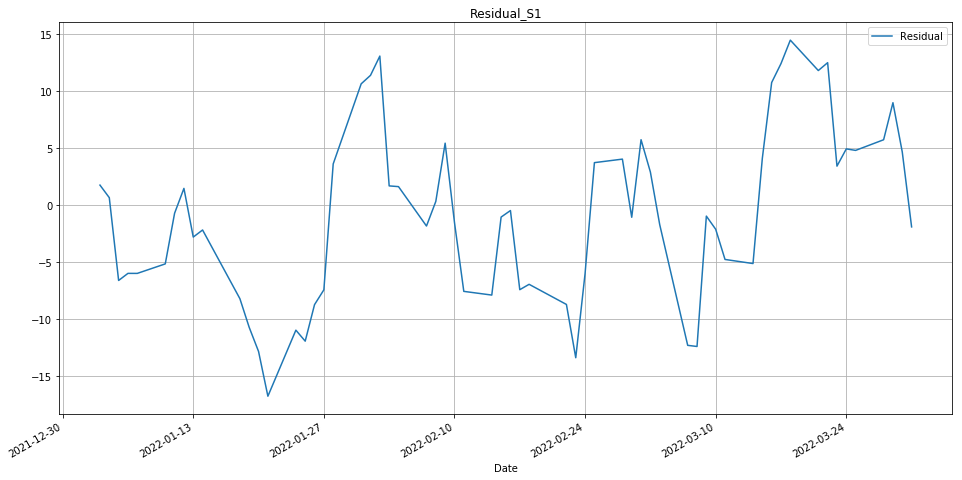

In [56]:
#Residual (Error) for SMA_1

res = df[2849:]['Close'] - df[2849:]['SMA_1']
res = pd.DataFrame(res)
res.rename(columns= {0: 'Residual'}, inplace = True)

res.plot(title = 'Residual_S1', figsize=(16,8), grid = True)

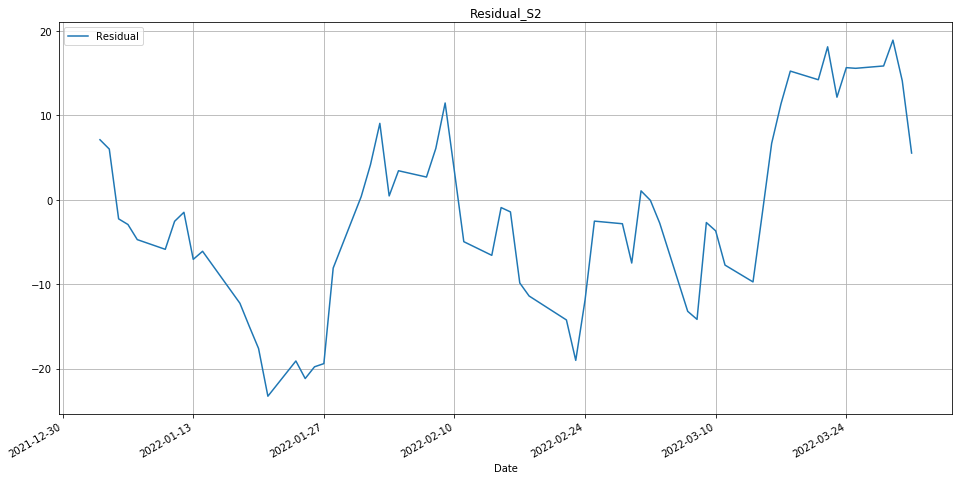

In [57]:
#Residual (Error) for SMA_2

res = df[2849:]['Close'] - df[2849:]['SMA_2']
res = pd.DataFrame(res)
res.rename(columns= {0: 'Residual'}, inplace = True)

res.plot(title = 'Residual_S2', figsize=(16,8), grid = True)

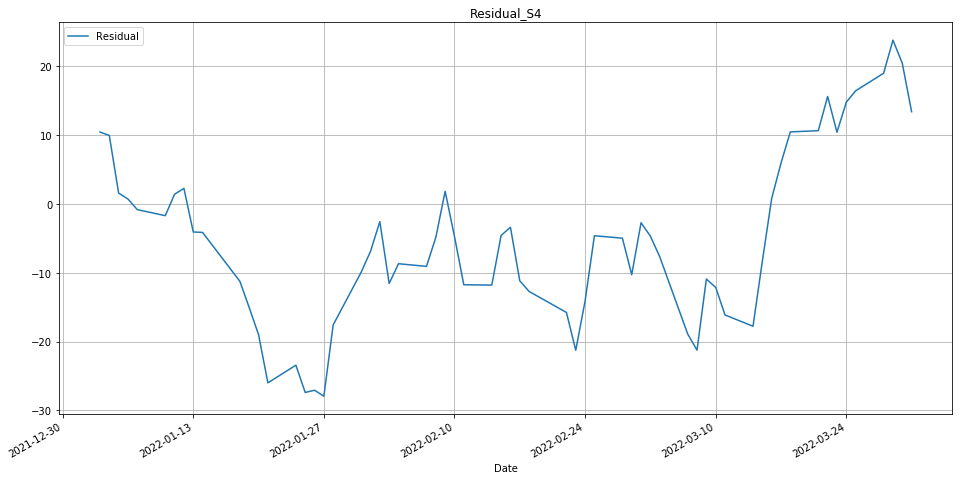

In [58]:
#Residual (Error) for SMA_4

res = df[2849:]['Close'] - df[2849:]['SMA_4']
res = pd.DataFrame(res)
res.rename(columns= {0: 'Residual'}, inplace = True)

res.plot(title = 'Residual_S4', figsize=(16,8), grid = True)

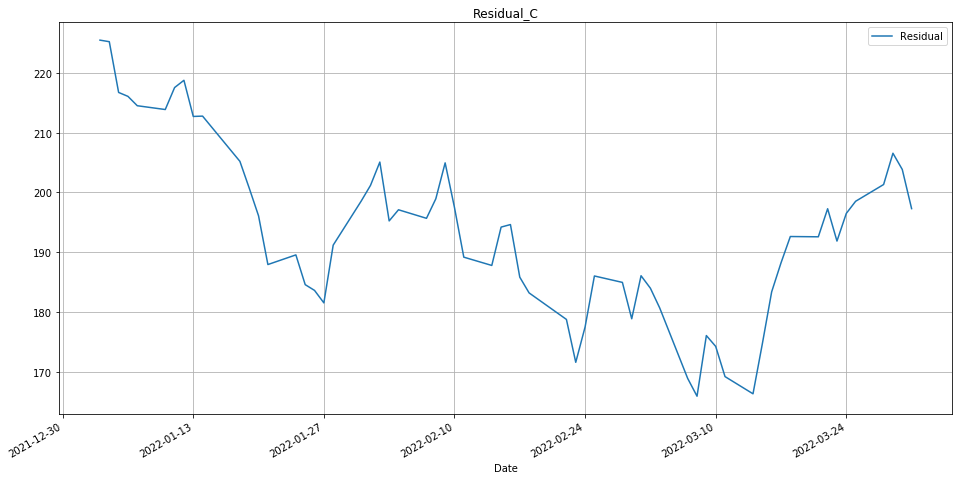

In [59]:
#Residual (Error) for CMA

res = df[2849:]['Close'] - df[2849:]['CMA']
res = pd.DataFrame(res)
res.rename(columns= {0: 'Residual'}, inplace = True)

res.plot(title = 'Residual_C', figsize=(16,8), grid = True)

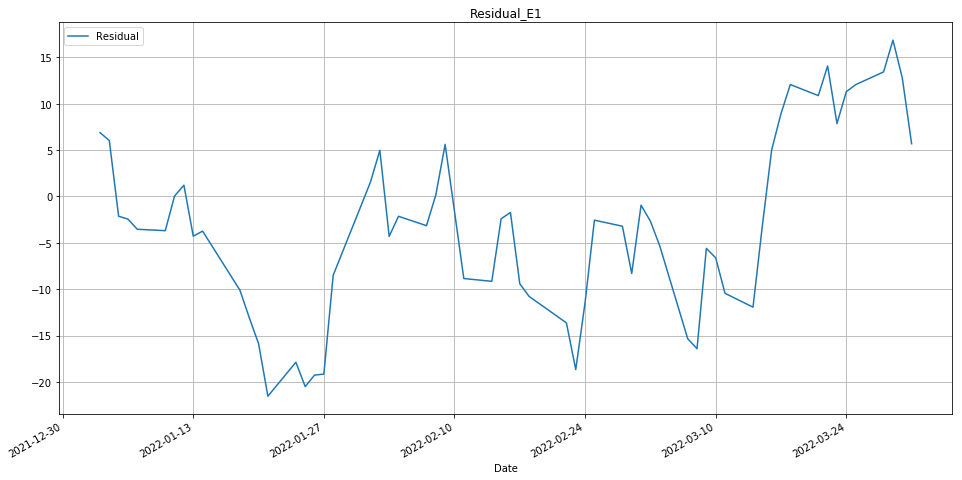

In [60]:
#Residual (Error) for EMA_0.1

res = df[2849:]['Close'] - df[2849:]['EMA_0.1']
res = pd.DataFrame(res)
res.rename(columns= {0: 'Residual'}, inplace = True)

res.plot(title = 'Residual_E1', figsize=(16,8), grid = True)

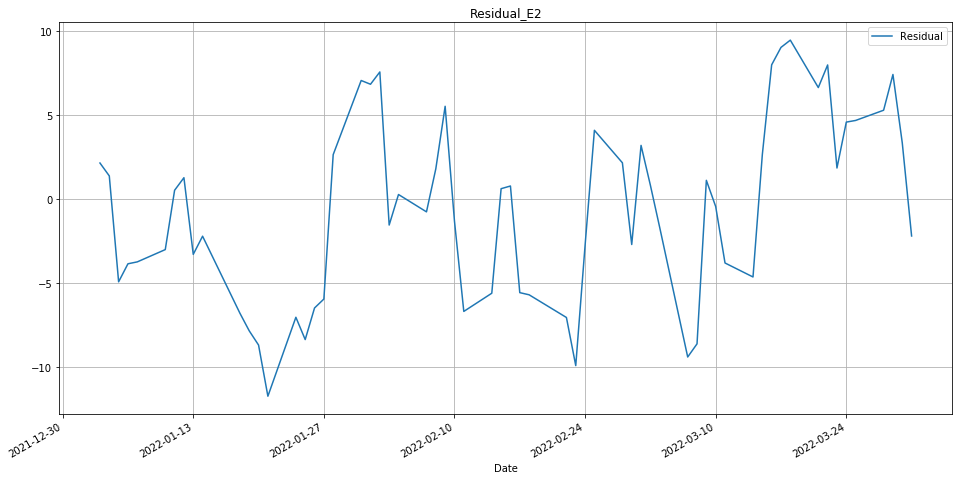

In [61]:
#Residual (Error) for EMA_0.3

res = df[2849:]['Close'] - df[2849:]['EMA_0.3']
res = pd.DataFrame(res)
res.rename(columns= {0: 'Residual'}, inplace = True)

res.plot(title = 'Residual_E2', figsize=(16,8), grid = True)

In [62]:
df["S1"] = df[2849:]['Close'] - df[2849:]['SMA_1']
df["S2"] = df[2849:]['Close'] - df[2849:]['SMA_2']
df["S4"] = df[2849:]['Close'] - df[2849:]['SMA_4']

df["C"] = df[2849:]['Close'] - df[2849:]['CMA']

df["E1"] = df[2849:]['Close'] - df[2849:]['EMA_0.1']
df["E3"] = df[2849:]['Close'] - df[2849:]['EMA_0.3']

In [63]:
df[2849:].mean()[7:]

S1     -0.899424
S2     -1.922731
S4     -5.178676
C     193.500572
E1     -3.209869
E3     -0.708402
dtype: float64

In [64]:
#Root Mean Square Error(RMSE)

print("Root Mean Square Error for SMA_1:", round(np.sqrt(np.mean((df["S1"] ** 2))), 5))
print("Root Mean Square Error for SMA_2:", round(np.sqrt(np.mean((df["S2"] ** 2))), 5))
print("Root Mean Square Error for SMA_4:", round(np.sqrt(np.mean((df["S4"] ** 2))), 5))
#print("\n")
print("Root Mean Square Error for CMA:", round(np.sqrt(np.mean((df["C"] ** 2))), 5))
#print("\n")
print("Root Mean Square Error for EMA_1:", round(np.sqrt(np.mean((df["E1"] ** 2))), 5))
print("Root Mean Square Error for EMA_3:", round(np.sqrt(np.mean((df["E3"] ** 2))), 5))

Root Mean Square Error for SMA_1: 7.59223
Root Mean Square Error for SMA_2: 10.9723
Root Mean Square Error for SMA_4: 13.52555
Root Mean Square Error for CMA: 194.03949
Root Mean Square Error for EMA_1: 10.12706
Root Mean Square Error for EMA_3: 5.43954


#### Looks like EMA_3 has the best predictive power overall since it has the lowest RMSE value

In [65]:
#Evaluating Model Performance

import math
from math import sqrt
from sklearn.metrics import mean_squared_error, mean_absolute_error


y_test = df[2849:]['Close']
predictions = df[2849:]['SMA_1']
print('Mean Square Error (MSE): '+str(mean_squared_error(predictions, y_test)))
print('Mean Absolute Error(MAE): '+str(mean_absolute_error(predictions, y_test)))
print('Root Mean Square Error (RMSE): '+str(math.sqrt(mean_squared_error(predictions, y_test))))

Mean Square Error (MSE): 57.64200212198009
Mean Absolute Error(MAE): 6.256842687932029
Root Mean Square Error (RMSE): 7.592233012887585


In [66]:
#Evaluating Model Performance

import math
from math import sqrt
from sklearn.metrics import mean_squared_error, mean_absolute_error


y_test = df[2849:]['Close']
predictions = df[2849:]['SMA_2']
print('Mean Square Error (MSE): '+str(mean_squared_error(predictions, y_test)))
print('Mean Absolute Error(MAE): '+str(mean_absolute_error(predictions, y_test)))
print('Root Mean Square Error (RMSE): '+str(math.sqrt(mean_squared_error(predictions, y_test))))

Mean Square Error (MSE): 120.39140110426953
Mean Absolute Error(MAE): 8.965979896932154
Root Mean Square Error (RMSE): 10.97230154089239


In [67]:
#Evaluating Model Performance

import math
from math import sqrt
from sklearn.metrics import mean_squared_error, mean_absolute_error


y_test = df[2849:]['Close']
predictions = df[2849:]['SMA_4']
print('Mean Square Error (MSE): '+str(mean_squared_error(predictions, y_test)))
print('Mean Absolute Error(MAE): '+str(mean_absolute_error(predictions, y_test)))
print('Root Mean Square Error (RMSE): '+str(math.sqrt(mean_squared_error(predictions, y_test))))

Mean Square Error (MSE): 182.94038430253244
Mean Absolute Error(MAE): 11.30070448141493
Root Mean Square Error (RMSE): 13.525545619402289


In [68]:
#Evaluating Model Performance

import math
from math import sqrt
from sklearn.metrics import mean_squared_error, mean_absolute_error


y_test = df[2849:]['Close']
predictions = df[2849:]['CMA']
print('Mean Square Error (MSE): '+str(mean_squared_error(predictions, y_test)))
print('Mean Absolute Error(MAE): '+str(mean_absolute_error(predictions, y_test)))
print('Root Mean Square Error (RMSE): '+str(math.sqrt(mean_squared_error(predictions, y_test))))

Mean Square Error (MSE): 37651.32430452671
Mean Absolute Error(MAE): 193.5005716096264
Root Mean Square Error (RMSE): 194.03949161066853


In [69]:
#Evaluating Model Performance

import math
from math import sqrt
from sklearn.metrics import mean_squared_error, mean_absolute_error


y_test = df[2849:]['Close']
predictions = df[2849:]['EMA_0.1']
print('Mean Square Error (MSE): '+str(mean_squared_error(predictions, y_test)))
print('Mean Absolute Error(MAE): '+str(mean_absolute_error(predictions, y_test)))
print('Root Mean Square Error (RMSE): '+str(math.sqrt(mean_squared_error(predictions, y_test))))

Mean Square Error (MSE): 102.55731515209625
Mean Absolute Error(MAE): 8.290902389890427
Root Mean Square Error (RMSE): 10.127058563674659


In [70]:
#Evaluating Model Performance

import math
from math import sqrt
from sklearn.metrics import mean_squared_error, mean_absolute_error


y_test = df[2849:]['Close']
predictions = df[2849:]['EMA_0.3']
print('Mean Square Error (MSE): '+str(mean_squared_error(predictions, y_test)))
print('Mean Absolute Error(MAE): '+str(mean_absolute_error(predictions, y_test)))
print('Root Mean Square Error (RMSE): '+str(math.sqrt(mean_squared_error(predictions, y_test))))

Mean Square Error (MSE): 29.588632831465134
Mean Absolute Error(MAE): 4.593649053833373
Root Mean Square Error (RMSE): 5.439543439615602


In [71]:
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

mape = round(mean_absolute_percentage_error(y_test, predictions),5)
accuracy = round(100 - mape, 5)

print("Mean Absolute Percentage Error (MAPE): " + str(mape) + " %")
print("Hence Accuracy of Model is: " + str(accuracy) + " %")

Mean Absolute Percentage Error (MAPE): 1.12907 %
Hence Accuracy of Model is: 98.87093 %


## Using Best Model for Apr 2022 Prediction

In [75]:
#Fetching data from Jan 2010 to Apr 2022

df = yf.download(tickers = "VOO", start="2010-01-01", end="2022-04-20")
df = df["Close"]
df = pd.DataFrame(df)
df.head()

[*********************100%***********************]  1 of 1 completed


,Close
Date,
2010-09-09,101.320000
2010-09-10,101.779999
2010-09-13,103.059998
2010-09-14,103.040001
2010-09-15,103.300003


In [81]:
#Exponential Moving Average

df['EMA_0.3'] = df.Close.ewm(alpha=0.3, adjust=False).mean() #Smoothing factor - 0.3

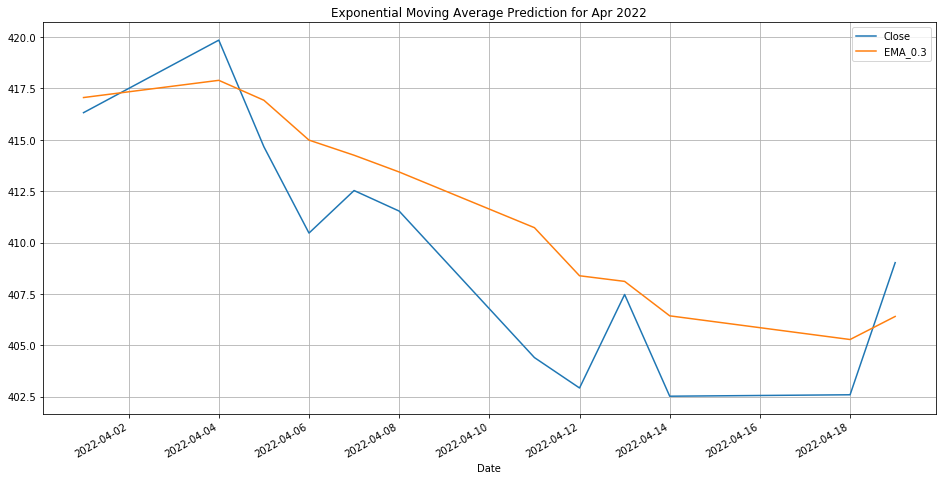

In [82]:
#Plotting Exponential Moving Average Prediction for Apr 2022

df[2911:][['Close','EMA_0.3']].plot(figsize=(16,8), title = "Exponential Moving Average Prediction for Apr 2022", grid = True)

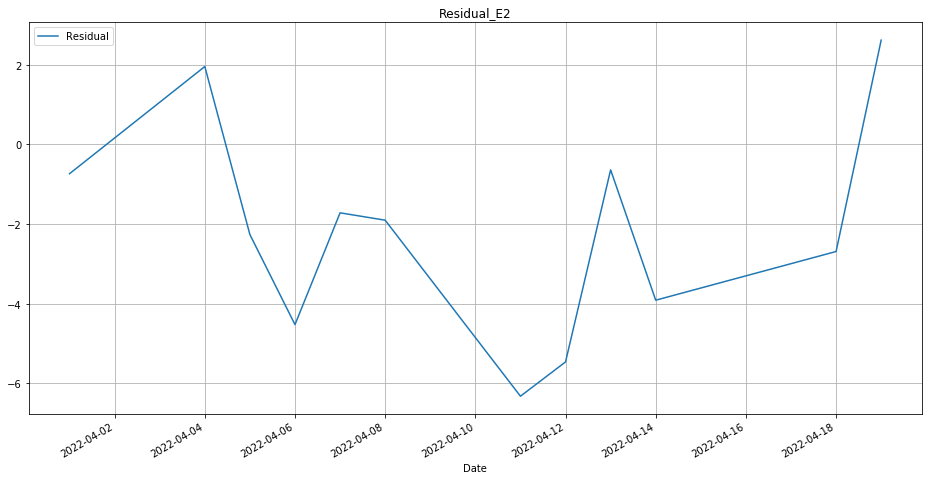

In [83]:
#Residual (Error) for EMA_0.3

res = df[2911:]['Close'] - df[2911:]['EMA_0.3']
res = pd.DataFrame(res)
res.rename(columns= {0: 'Residual'}, inplace = True)

res.plot(title = 'Residual_E2', figsize=(16,8), grid = True)

In [84]:
#Evaluating Model Performance

import math
from math import sqrt
from sklearn.metrics import mean_squared_error, mean_absolute_error


y_test = df[2911:]['Close']
predictions = df[2911:]['EMA_0.3']
print('Mean Square Error (MSE): '+str(mean_squared_error(predictions, y_test)))
print('Mean Absolute Error(MAE): '+str(mean_absolute_error(predictions, y_test)))
print('Root Mean Square Error (RMSE): '+str(math.sqrt(mean_squared_error(predictions, y_test))))

Mean Square Error (MSE): 11.34601775644761
Mean Absolute Error(MAE): 2.8953888364081215
Root Mean Square Error (RMSE): 3.368385036845938


In [85]:
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

mape = round(mean_absolute_percentage_error(y_test, predictions),5)
accuracy = round(100 - mape, 5)

print("Mean Absolute Percentage Error (MAPE): " + str(mape) + " %")
print("Hence Accuracy of Model is: " + str(accuracy) + " %")

Mean Absolute Percentage Error (MAPE): 0.71048 %
Hence Accuracy of Model is: 99.28952 %


Made by: Hari N. Khatavkar

Credit: https://towardsdatascience.com/moving-averages-in-python-16170e20f6c